## Watershed

#### Watershed is used for seperating the other objects in image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

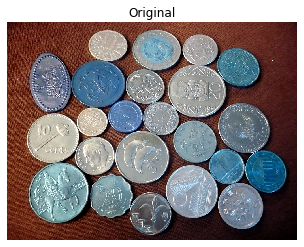

In [2]:
coin = cv2.imread("data/coins.jpg")

plt.figure(), plt.title("Original"), plt.imshow(coin), plt.axis("off");

#  Low-Pass Filtering

- Blurring

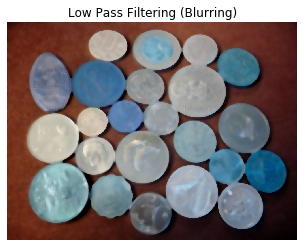

In [3]:
coin_blur = cv2.medianBlur(src=coin, ksize=13)

plt.figure(), plt.title("Low Pass Filtering (Blurring)"), plt.imshow(coin_blur), plt.axis("off");

# Gray Scale

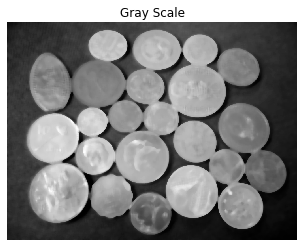

In [4]:
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)

plt.figure(), plt.title("Gray Scale"), plt.imshow(coin_gray, cmap="gray"), plt.axis("off");

# Binary Threshold

Using Binary Threshold, I will make it specific

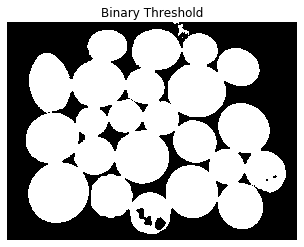

In [5]:
ret, coin_thres = cv2.threshold(src=coin_gray, thresh=75, maxval=255, type=cv2.THRESH_BINARY)

plt.figure(), plt.title("Binary Threshold"), plt.imshow(coin_thres, cmap="gray"), plt.axis("off");

# Contour

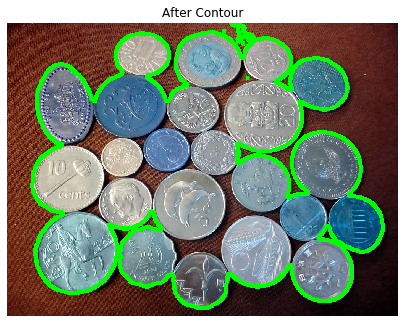

In [6]:
contour, hierarchy = cv2.findContours(image=coin_thres.copy(), mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contour)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image=coin,contours=contour,contourIdx=i, color=(0,255,0), thickness=10)
        
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(coin, cmap="gray"), plt.axis("off");

---

# Preprocessing After Watershed

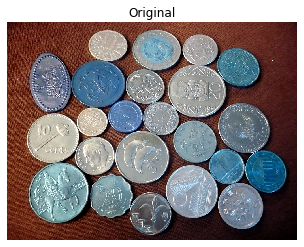

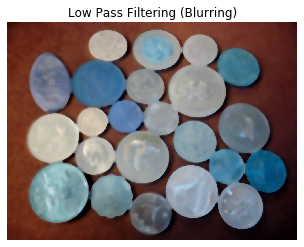

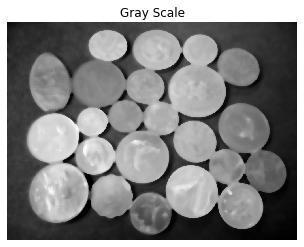

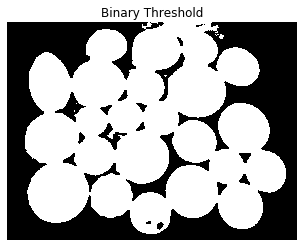

In [7]:
# read data
coin = cv2.imread("data/coins.jpg")
plt.figure(), plt.title("Original"), plt.imshow(coin), plt.axis("off");

# Blurring
coin_blur = cv2.medianBlur(src=coin, ksize=15)
plt.figure(), plt.title("Low Pass Filtering (Blurring)"), plt.imshow(coin_blur), plt.axis("off");

# Gray Scale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.title("Gray Scale"), plt.imshow(coin_gray, cmap="gray"), plt.axis("off");

# Binary Threshold
ret, coin_thres = cv2.threshold(src=coin_gray, thresh=65, maxval=255, type=cv2.THRESH_BINARY)
plt.figure(), plt.title("Binary Threshold"), plt.imshow(coin_thres, cmap="gray"), plt.axis("off");

First I need to remove connetion between coins. Almostly every coins connetc other self, therefor using Opening from Morphological Operations, I will open them 

# Opening

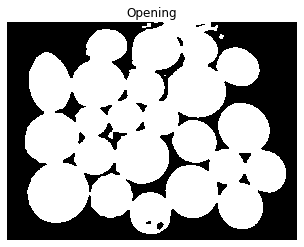

In [8]:
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(coin_thres, cv2.MORPH_OPEN, kernel=kernel, iterations=2)

plt.figure(), plt.title("Opening"), plt.imshow(opening, cmap="gray"), plt.axis("off");

# Finding Distance Between Objects

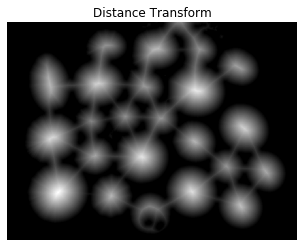

In [9]:
dist_transform = cv2.distanceTransform(src=opening, distanceType=cv2.DIST_L2, maskSize=5)

plt.figure(), plt.title("Distance Transform"), plt.imshow(dist_transform, cmap="gray"), plt.axis("off");

# Minimizing Object to Find Object which is in foreground

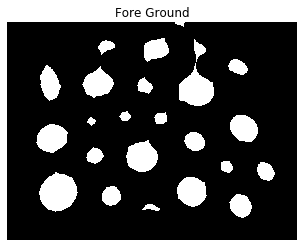

In [10]:
ret, sure_foreground = cv2.threshold(src=dist_transform, thresh=0.4*np.max(dist_transform), maxval=255, type=0)

plt.figure(), plt.title("Fore Ground"), plt.imshow(sure_foreground, cmap="gray"), plt.axis("off");

# Enlarging Image to find Background

In [11]:
sure_background = cv2.dilate(src=opening, kernel=kernel, iterations=1) #int

sure_foreground = np.uint8(sure_foreground) # change its format to int

# Subtrack Between BackGround and ForeGround 
## (Background - Foreground)

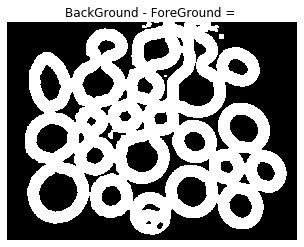

In [12]:
unknown = cv2.subtract(sure_background, sure_foreground)

plt.figure(), plt.title("BackGround - ForeGround = "), plt.imshow(unknown, cmap="gray"), plt.axis("off");

# Connection

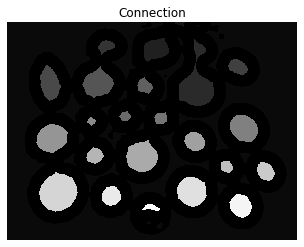

In [13]:
ret, marker = cv2.connectedComponents(sure_foreground)

marker = marker + 1

marker[unknown == 255] = 0 # White area is turned into Black to find island for watershed

plt.figure(), plt.title("Connection"), plt.imshow(marker, cmap="gray"), plt.axis("off");

# Watershed

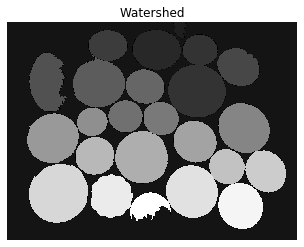

In [14]:
marker = cv2.watershed(image=coin, markers=marker)

plt.figure(), plt.title("Watershed"), plt.imshow(marker, cmap="gray"), plt.axis("off");

# Find Contours and Draw Line Around of Coins

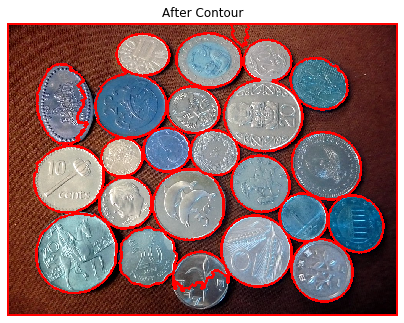

In [15]:
contour, hierarchy = cv2.findContours(image=marker.copy(), mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contour)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image=coin,contours=contour,contourIdx=i, color=(255,0,0), thickness=3)
        
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(coin, cmap="gray"), plt.axis("off");